# Optimizing an ML Pipeline in Azure

## Overview
This project is part of the Udacity Azure ML Nanodegree. The project is two fold.
1.  we build and optimize an Azure ML pipeline using the Python SDK and a provided Scikit-learn  Logistic Regression model.
Hyperparameters of the model was optimized using HyperDrive.  
2. AutoML run is also used to find an optimal model using the same dataset. 

Finally, results was compared with thse two methods.
Image below shows the structure of these tw omethods.

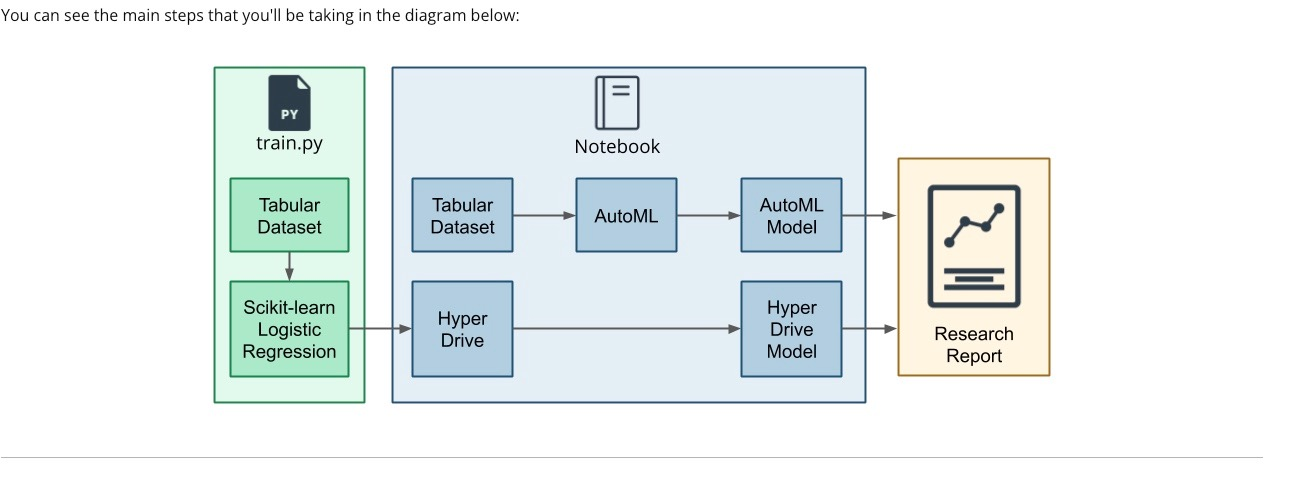.


## Useful Resources
- [ScriptRunConfig Class](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.scriptrunconfig?view=azure-ml-py)
- [Configure and submit training runs](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-set-up-training-targets)
- [HyperDriveConfig Class](https://docs.microsoft.com/en-us/python/api/azureml-train-core/azureml.train.hyperdrive.hyperdriveconfig?view=azure-ml-py)
- [How to tune hyperparamters](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-tune-hyperparameters)



## Summary
The dataset contains data about direct marketing purposes(phone calls) of the banking sector.
We seek to predict whether the individual will subscribe bank term deposit, column y ( yes/no).


The best performing model was AutoML VotingEnsemble, accuracy was 91.7 %. However logistic regression is comparable in accuracy. 
 
## Scikit-learn Pipeline

RandomParameterSampling was chosen. Following hyperparameters were used: regularisation, C,  and maximum iterations, max_ter.
 '--C' : choice(0.1,1,10,20,50,100,200,500),
 '--max_iter': choice(30,50,100,200,300)

using RandomParaneterSampling every memeber of the population has equal chance to be selected.
It is faster and supports early termination of low performance runs.
Early stopping policy is made as follows:
 
BanditPolicy(evaluation_interval=2, slack_factor=0.1, slack_amount=None, delay_evaluation=0)

Early stopping is a form of regularisation. It saves computing resources and avoids overfitting 
and it is performed automatically. 

slack_factor: The policy early terminates any runs where the primary metric is not within 
the specified slack factor with respect to the best performing training run. This means that best runs runs all the way.

Scikit-Learn algorithm chosen is  binary logistic regression for classifiaction.

## AutoML

The following configuration for AutoML was used:

automl_config = AutoMLConfig(
    experiment_timeout_minutes=30,
    task='classification',
    primary_metric='accuracy',
    training_data=dataset,
    label_column_name='y',
    n_cross_validations= 2)
    
1. experiment_timeout_minutes defines how long experiment should continue to run in minutes. Parameter is chosen to be 30.
2. primary_metric is set to accuracy. The same metric is used as in Scikit-Learn pipeline for comparition reasons.
3. task is classification.
4. training_data used is the same as in scikit learn pipeline.
5. label_column_name: column name for label.
6. n_cross_validation: sets how amny times cross validation is performed with the same  number of fold. It is set to very low number due to it might cause overfitting if performed too many times.

## Pipeline comparison

Scikit_learn: Binary Logistic Regression:
              
    Best model metrics: {'Max iterations:': 50, 'Regularization Strength:': 0.1, 'Accuracy': 0.9115320949052786}
    which is 91.2% in accuracy.

AutoML: Estimator is VotingEnsemble and soft voting is used. It used soft voting principle where  every 
        individual classifier provides a probability value that a data point belongs to a particular target class.
        The predictions are weighted by the classifier's importance and summed up. 
        Then the target label with the greatest sum of weighted probabilities wins the vote.

        The results for the best model is:
        'accuracy': 0.9167830045523521, that is 91.7 %
        'f1_score_weighted': 91.5%
        'AUC_weighted': 94.7 %

        
There is not much difference in methods. Scikit-Learn only were run on binary logistic Regression but AutoMl is run by ensemble of methods 
and also AUC and F1-score is counted which are better metrics for skewed data distribution.

## Future work

There are approximate 10 times more no values  than yes values in column y and tehrefore, dataset is very skewed.
Accuracy is not that good measure of skewed datasets instead F1-score or AUC-curve would improve the measure.
More equally distributed classes  generalize better in training.  F1-score takes into account the type of errors such as  
false positive and false negative and not just the number of predictions that were incorrect.

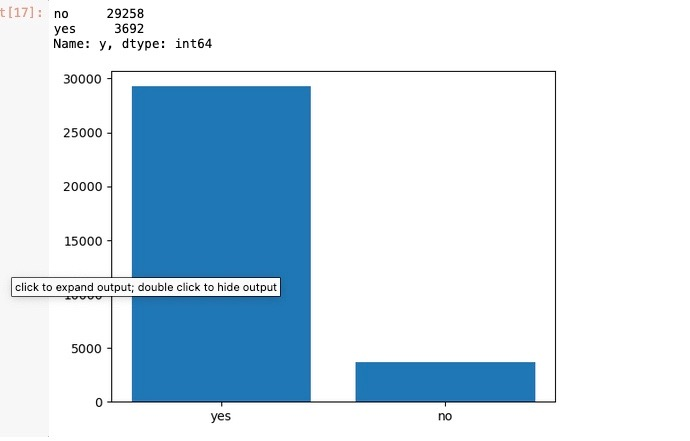

## Proof of cluster clean up
see the code.